In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  
import numpy as np
from scipy.stats import spearmanr
from scipy.stats import chi2_contingency
from math import sqrt
import dtale  
import utils


In [2]:
df = pd.read_csv("../heart.csv")

Aucune variable manquante dans le data set

In [3]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Regardons maintenant nos variables catégorielles : 

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns


In [6]:
categorical_cols

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

Appliquons maintenant la binarisation

In [7]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

In [8]:
df_encoded

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,False,True,False,...,False,False,False,True,False,True,False,False,False,True
1,49,160,180,0,156,1.0,1,True,False,False,...,True,False,False,True,False,True,False,False,True,False
2,37,130,283,0,98,0.0,0,False,True,False,...,False,False,False,False,True,True,False,False,False,True
3,48,138,214,0,108,1.5,1,True,False,True,...,False,False,False,True,False,False,True,False,True,False
4,54,150,195,0,122,0.0,0,False,True,False,...,True,False,False,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,False,True,False,...,False,True,False,True,False,True,False,False,True,False
914,68,144,193,1,141,3.4,1,False,True,True,...,False,False,False,True,False,True,False,False,True,False
915,57,130,131,0,115,1.2,1,False,True,True,...,False,False,False,True,False,False,True,False,True,False
916,57,130,236,0,174,0.0,1,True,False,False,...,False,False,True,False,False,True,False,False,True,False


<h1 color="red">IL FAUT ENLEVER LES VALEURS ABÉRRANTES </h1>

Il est important de voir la corrélation entres les variables de notre data set et la cible : 

In [9]:
all_cols = df.columns.tolist()

# Assurez-vous d'ajouter votre colonne 'Target' si elle n'est pas déjà dans categorical_cols
cols_to_exclude = categorical_cols.tolist() + ['HeartDisease']

# 3. Récupérer les variables quantitatives par différence
quantitative_cols = [col for col in all_cols if col not in cols_to_exclude]

print("Variables Quantitatives Récupérées :")
print(quantitative_cols)

Variables Quantitatives Récupérées :
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


In [10]:
print("Corrélation des variables quantitatives avec Heart Disease (Pearson) :")
for col in quantitative_cols:
    correlation = df[col].corr(df['HeartDisease'])
    print(f"- {col:<20}: {correlation:.4f}")

Corrélation des variables quantitatives avec Heart Disease (Pearson) :
- Age                 : 0.2820
- RestingBP           : 0.1076
- Cholesterol         : -0.2327
- FastingBS           : 0.2673
- MaxHR               : -0.4004
- Oldpeak             : 0.4040


In [11]:
print("Corrélation des variables quantitatives avec Heart Disease (Spearman) :")
for col in quantitative_cols:
    rho, p_value = spearmanr(df[col], df['HeartDisease'])
    
    print(f"- {col:<20}: {rho:.4f} (p-value: {p_value:.3f})")

Corrélation des variables quantitatives avec Heart Disease (Spearman) :
- Age                 : 0.2896 (p-value: 0.000)
- RestingBP           : 0.1139 (p-value: 0.001)
- Cholesterol         : -0.1399 (p-value: 0.000)
- FastingBS           : 0.2673 (p-value: 0.000)
- MaxHR               : -0.4048 (p-value: 0.000)
- Oldpeak             : 0.4190 (p-value: 0.000)


On fait pareil pour nos variables catégorielles en utilisant le test de Chi-Deux

In [12]:
all_cols = df_encoded.columns.tolist()

to_excluded = quantitative_cols + ["HeartDisease"]

categorical_binary_cols = [c for c in all_cols if c not in to_excluded]


In [13]:
categorical_binary_cols

['Sex_F',
 'Sex_M',
 'ChestPainType_ASY',
 'ChestPainType_ATA',
 'ChestPainType_NAP',
 'ChestPainType_TA',
 'RestingECG_LVH',
 'RestingECG_Normal',
 'RestingECG_ST',
 'ExerciseAngina_N',
 'ExerciseAngina_Y',
 'ST_Slope_Down',
 'ST_Slope_Flat',
 'ST_Slope_Up']

In [14]:
for col in categorical_binary_cols:
    # 1. Créer le tableau de contingence (croisement des fréquences)
    contingency_table = pd.crosstab(df_encoded[col], df_encoded['HeartDisease'])

    # 2. Effectuer le test du Chi-Deux
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    # 3. Calculer le V de Cramér
    # Puisque nous comparons une colonne binaire (2 lignes) à une cible binaire (2 colonnes), 
    # la formule simplifiée est la suivante (pour une table 2x2, V de Cramér = Phi Coefficient) :
    min_dim = min(contingency_table.shape) - 1
    v_cramer = sqrt(chi2 / (len(df_encoded) * min_dim))
    
    # Affichage du résultat
    significance = "Significatif (p < 0.05)" if p_value < 0.05 else "Non Significatif"
    
    print(f"- {col:<30}: V de Cramér = {v_cramer:.4f} ({significance}, p={p_value:.3f})")


- Sex_F                         : V de Cramér = 0.3028 (Significatif (p < 0.05), p=0.000)
- Sex_M                         : V de Cramér = 0.3028 (Significatif (p < 0.05), p=0.000)
- ChestPainType_ASY             : V de Cramér = 0.5145 (Significatif (p < 0.05), p=0.000)
- ChestPainType_ATA             : V de Cramér = 0.3991 (Significatif (p < 0.05), p=0.000)
- ChestPainType_NAP             : V de Cramér = 0.2103 (Significatif (p < 0.05), p=0.000)
- ChestPainType_TA              : V de Cramér = 0.0498 (Non Significatif, p=0.132)
- RestingECG_LVH                : V de Cramér = 0.0080 (Non Significatif, p=0.810)
- RestingECG_Normal             : V de Cramér = 0.0893 (Significatif (p < 0.05), p=0.007)
- RestingECG_ST                 : V de Cramér = 0.0998 (Significatif (p < 0.05), p=0.003)
- ExerciseAngina_N              : V de Cramér = 0.4920 (Significatif (p < 0.05), p=0.000)
- ExerciseAngina_Y              : V de Cramér = 0.4920 (Significatif (p < 0.05), p=0.000)
- ST_Slope_Down         

Faire l'analyse (simple)

In [15]:
# Afficher le nombre de valeurs manquantes par colonne
print("Nombre de valeurs manquantes par colonne :\n", df_encoded.isnull().sum())

Nombre de valeurs manquantes par colonne :
 Age                  0
RestingBP            0
Cholesterol          0
FastingBS            0
MaxHR                0
Oldpeak              0
HeartDisease         0
Sex_F                0
Sex_M                0
ChestPainType_ASY    0
ChestPainType_ATA    0
ChestPainType_NAP    0
ChestPainType_TA     0
RestingECG_LVH       0
RestingECG_Normal    0
RestingECG_ST        0
ExerciseAngina_N     0
ExerciseAngina_Y     0
ST_Slope_Down        0
ST_Slope_Flat        0
ST_Slope_Up          0
dtype: int64


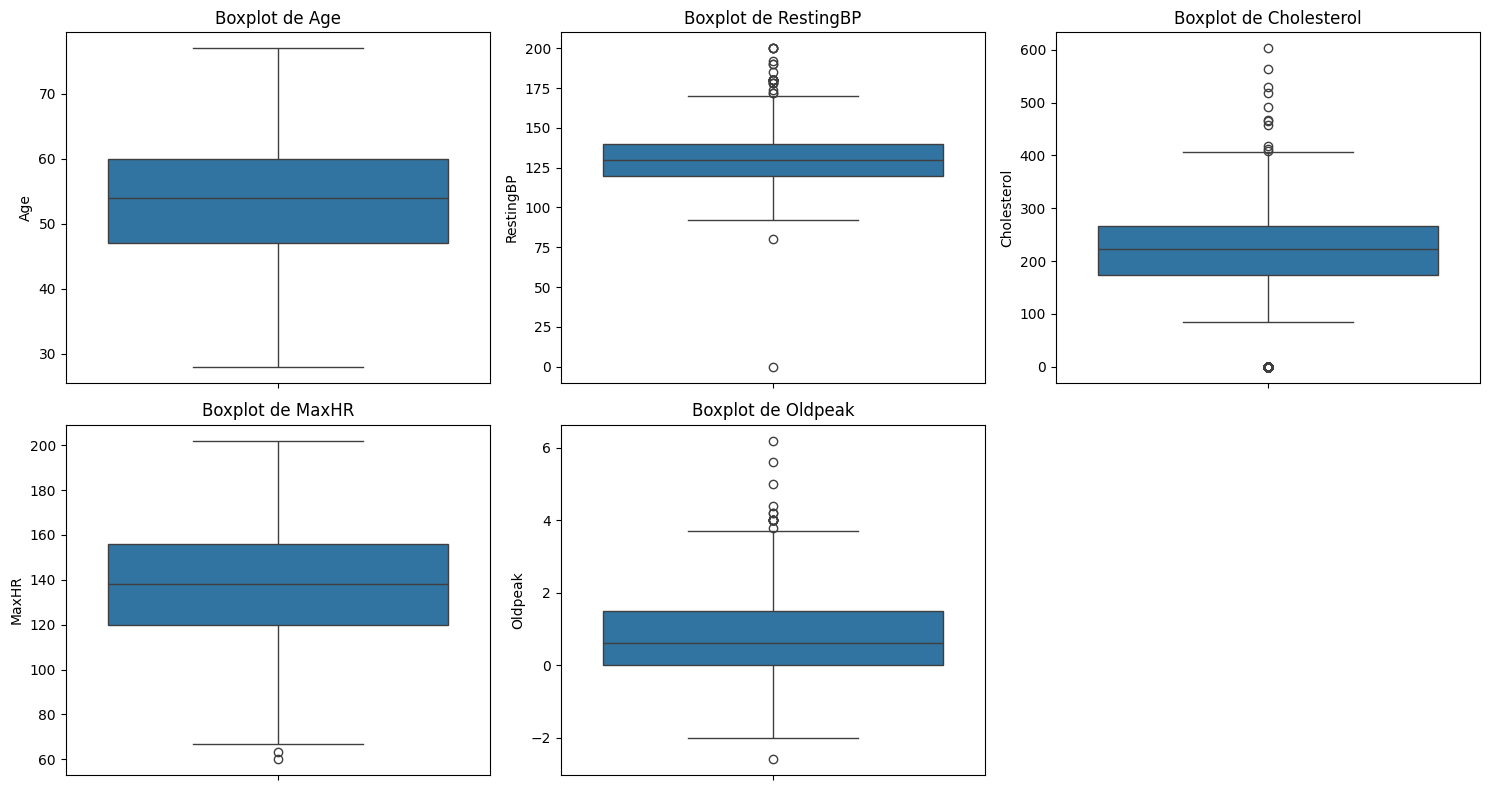

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste des variables quantitatives initiales
quantitative_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    # Utilisez le DataFrame original avant encodage si vous l'avez, sinon utilisez df_encoded
    sns.boxplot(y=df_encoded[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

In [17]:
print(f"Nombre de lignes avant la suppression : {len(df_encoded)}")
print(f"Nombre de RestingBP = 0 : {(df_encoded['RestingBP'] == 0).sum()}")

# Suppression des lignes où RestingBP est égal à 0
df_encoded = df_encoded[df_encoded['RestingBP'] != 0]

# Après la suppression
print(f"Nombre de lignes après la suppression : {len(df_encoded)}")

Nombre de lignes avant la suppression : 918
Nombre de RestingBP = 0 : 1
Nombre de lignes après la suppression : 917


Distribution des données 

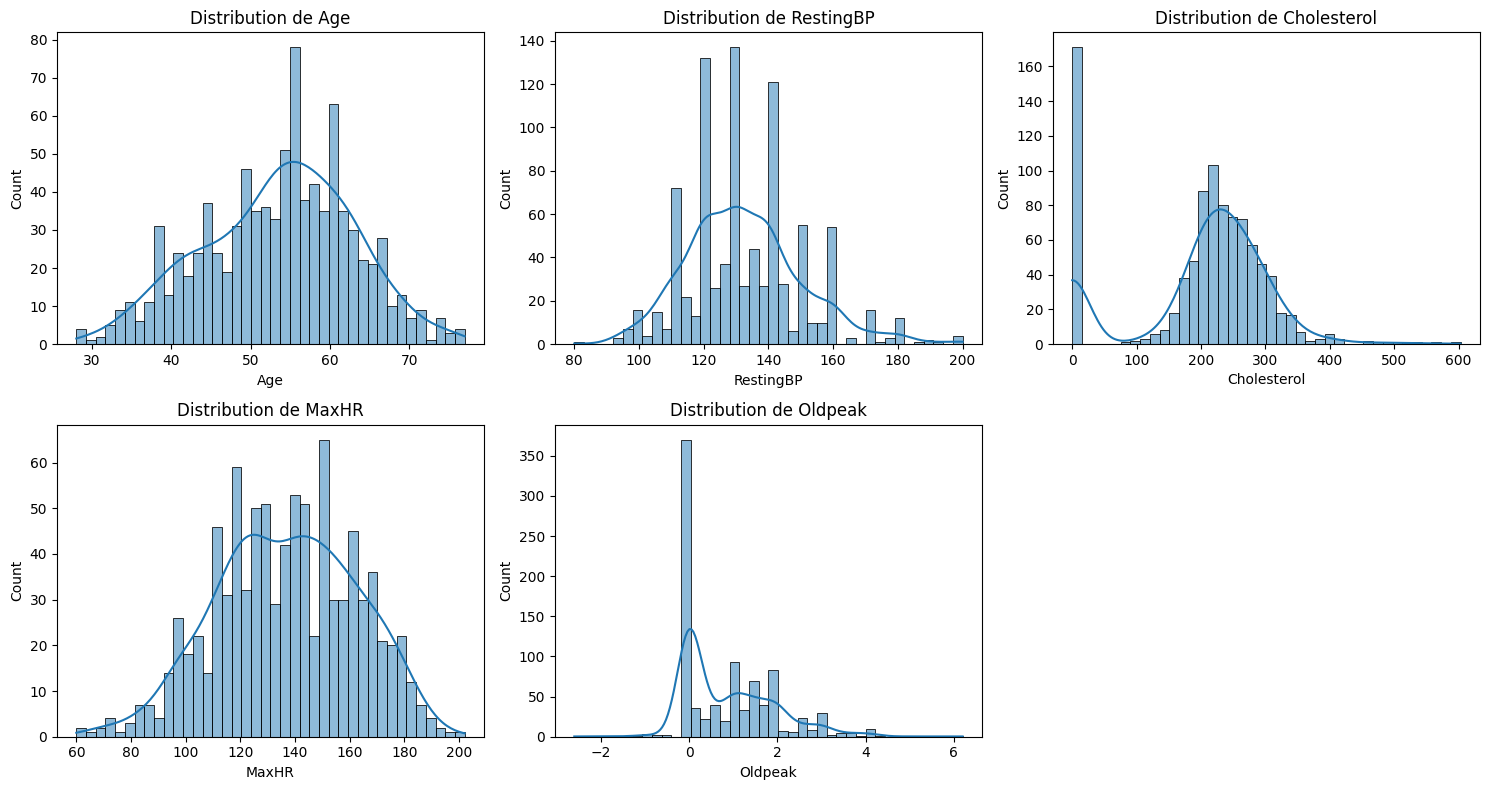

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste de vos variables quantitatives (après nettoyage RestingBP=0)
quantitative_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    # Utilisez un histogramme combiné à un KDE plot (courbe de densité)
    sns.histplot(df_encoded[col], kde=True, bins=40)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [19]:
print(f"Nombre de lignes avant la suppression : {len(df_encoded)}")
print(f"Nombre de RestingBP = 0 : {(df_encoded['Cholesterol'] == 0).sum()}")

# Suppression des lignes où RestingBP est égal à 0
df_encoded = df_encoded[df_encoded['Cholesterol'] != 0]

# Après la suppression
print(f"Nombre de lignes après la suppression : {len(df_encoded)}")

Nombre de lignes avant la suppression : 917
Nombre de RestingBP = 0 : 171
Nombre de lignes après la suppression : 746


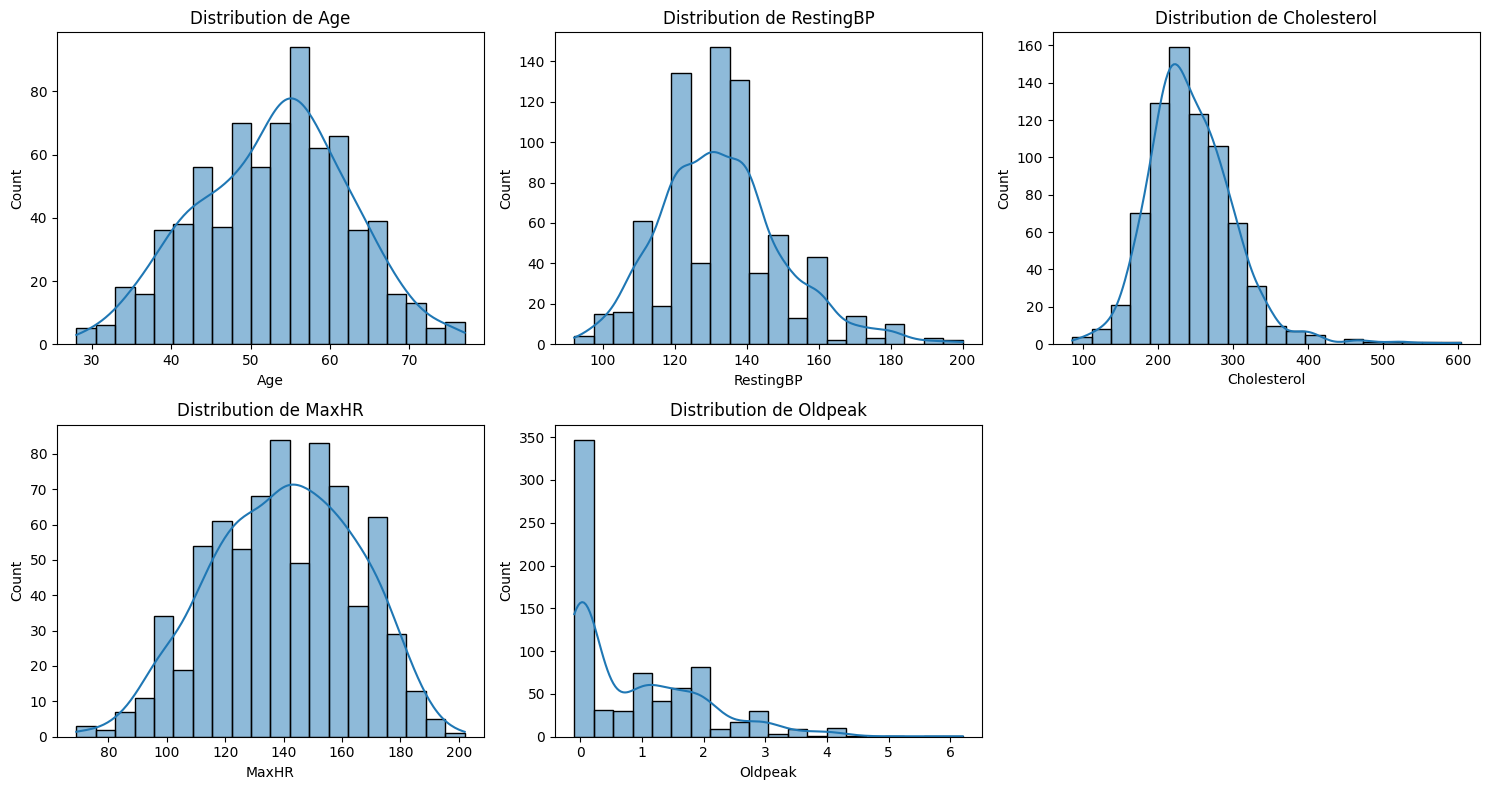

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Liste de vos variables quantitatives (après nettoyage RestingBP=0)
quantitative_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

plt.figure(figsize=(15, 8))
for i, col in enumerate(quantitative_cols):
    plt.subplot(2, 3, i + 1)
    # Utilisez un histogramme combiné à un KDE plot (courbe de densité)
    sns.histplot(df_encoded[col], kde=True, bins=20)
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

In [21]:
import numpy as np 


# 1. Gestion des colonnes (Drop First + suppression de la cible)
columns_to_drop = [
    'HeartDisease',      
    'Sex_F',             
    'ExerciseAngina_N'
    # 'ChestPainType_TA',
    # 'RestingECG_LVH'
] 

# Créer votre jeu de features X
X = df_encoded.drop(columns=columns_to_drop, errors='ignore')



In [22]:

# 1. Définition des colonnes quantitatives
quantitative_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


# 3. Application de la transformation
X_scaled_selective = utils.scaleData(X, quantitative_cols)


In [23]:
X_scaled_selective

array([[-1.35607325,  0.40398044,  0.7504942 , ...,  0.        ,
         0.        ,  1.        ],
       [-0.40865641,  1.5619801 , -1.09340492, ...,  0.        ,
         1.        ,  0.        ],
       [-1.67187886, -0.17501939,  0.64899516, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.43349189, -0.17501939, -1.92231369, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.43349189, -0.17501939, -0.1460806 , ...,  0.        ,
         1.        ,  0.        ],
       [-1.56661032,  0.28818048, -1.17798745, ...,  0.        ,
         0.        ,  1.        ]], shape=(746, 18))

--- Analyse de la Variance Expliquée ---
Variance expliquée par la Composante Principale 1 (CP1): 26.7 %
Variance expliquée par la Composante Principale 2 (CP2): 13.2 %
Variance cumulée (CP1 + CP2): 39.9 %
------------------------------------------------------------


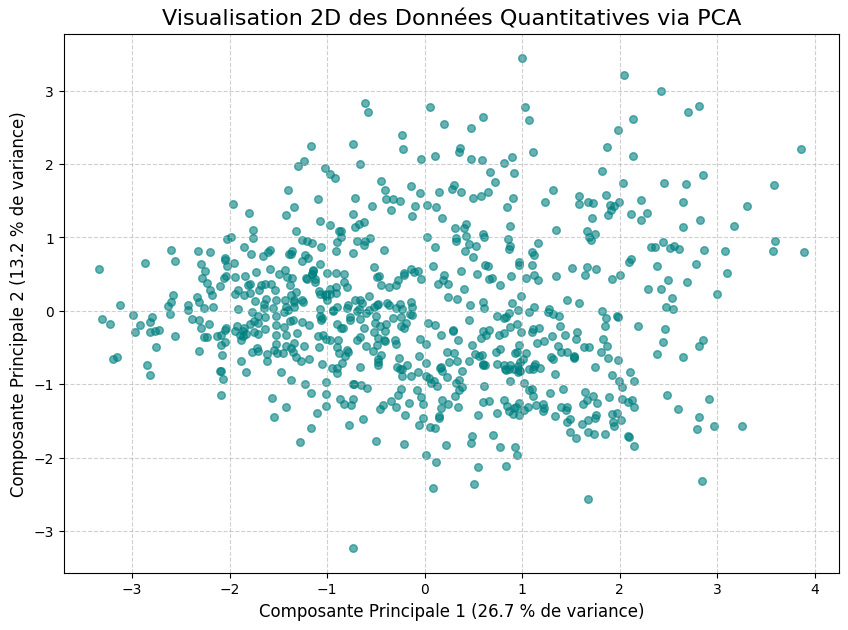

In [24]:
from sklearn.decomposition import PCA


X_pca = utils.showPCA2dim(X_scaled_selective)


In [25]:
X_pca

array([[-1.9817996 ,  1.00908726],
       [-0.25697441,  0.09307364],
       [-0.84153611, -0.23463716],
       ...,
       [ 0.7754251 , -1.85946438],
       [-0.9977044 ,  0.51973111],
       [-2.31368133,  0.1212708 ]], shape=(746, 2))

In [26]:
df_pca = pd.DataFrame(
    data=X_pca,
    columns=['CP1', 'CP2']
)

In [27]:
df_pca["HeartDisease"] = df_encoded["HeartDisease"]

In [28]:
df_pca

,CP1,CP2,HeartDisease
0,-1.981800,1.009087,0.0
1,-0.256974,0.093074,1.0
2,-0.841536,-0.234637,0.0
3,0.848260,-1.301800,1.0
4,-0.296703,0.036452,0.0
...,...,...,...
741,-0.595154,-1.053422,1.0
742,2.686287,0.398681,0.0
743,0.775425,-1.859464,0.0
744,-0.997704,0.519731,1.0


<Axes: xlabel='CP1', ylabel='CP2'>

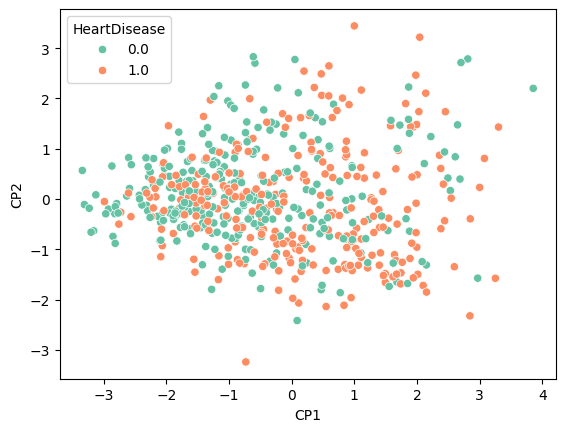

In [29]:
sns.scatterplot(data=df_pca, x="CP1", y="CP2", hue="HeartDisease", palette="Set2")


In [30]:
# 1. Instanciation de la PCA pour conserver 90% de la variance
X_reduced = utils.reducedPcaWith90(X_scaled_selective)

--- Réduction de Dimension (PCA pour 90% de Variance) ---
Nombre initial de features : 18
Nombre de Composantes Principales (CP) retenues pour 90% : 9
Variance cumulée expliquée : 90.23 %
------------------------------------------------------------
Forme du nouvel ensemble de features : (746, 9)

Premières lignes de l'espace réduit (X_reduced) :
[[-1.9817996   1.00908726  0.89295597  0.67084925 -0.10930625 -0.50824702
   0.307387   -0.09777774 -0.30302044]
 [-0.25697441  0.09307364 -0.54543814  1.9393601  -0.08500998 -0.34078012
   0.23782184  0.86942643  1.0912748 ]
 [-0.84153611 -0.23463716  0.5241518  -0.79759914 -1.19376408 -1.69880022
  -0.36548133 -1.66443875  0.47757422]
 [ 0.84825986 -1.30180032  0.08024796  0.2175616  -0.26333963 -1.13991754
   0.03910539  0.25522945  0.08839849]
 [-0.29670324  0.03645215 -0.9814867   0.68672869 -1.49054385 -0.38242267
   0.48028725 -0.13191344  0.53858131]]


In [31]:
from sklearn.metrics import silhouette_score



# Définition des paramètres de recherche
# Eps est réduit car l'espace est plus compact
eps_to_test = [0.5, 0.8, 1.0, 1.2, 1.5, 2.0, 3, 4 , 5, 6]
# MinPts est conservé bas pour chercher des petites structures
min_samples_to_test = [5, 10, 15, 20, 30]

best_params = None 
best_params = utils.gridSearchDBScan(X_reduced, eps_to_test, min_samples_to_test)

Eps: 0.5, MinPts: 5
  Bruit: 746 (100.0 %)
  Clusters: 0, Score Silhouette: N/A
Eps: 0.5, MinPts: 10
  Bruit: 746 (100.0 %)
  Clusters: 0, Score Silhouette: N/A
Eps: 0.5, MinPts: 15
  Bruit: 746 (100.0 %)
  Clusters: 0, Score Silhouette: N/A
Eps: 0.5, MinPts: 20
  Bruit: 746 (100.0 %)
  Clusters: 0, Score Silhouette: N/A
Eps: 0.5, MinPts: 30
  Bruit: 746 (100.0 %)
  Clusters: 0, Score Silhouette: N/A
Eps: 0.8, MinPts: 5
  Bruit: 698 (93.6 %)
  Clusters: 4, Score Silhouette: 0.198
Eps: 0.8, MinPts: 10
  Bruit: 746 (100.0 %)
  Clusters: 0, Score Silhouette: N/A
Eps: 0.8, MinPts: 15
  Bruit: 746 (100.0 %)
  Clusters: 0, Score Silhouette: N/A
Eps: 0.8, MinPts: 20
  Bruit: 746 (100.0 %)
  Clusters: 0, Score Silhouette: N/A
Eps: 0.8, MinPts: 30
  Bruit: 746 (100.0 %)
  Clusters: 0, Score Silhouette: N/A
Eps: 1.0, MinPts: 5
  Bruit: 594 (79.6 %)
  Clusters: 8, Score Silhouette: 0.1559
Eps: 1.0, MinPts: 10
  Bruit: 688 (92.2 %)
  Clusters: 1, Score Silhouette: N/A
Eps: 1.0, MinPts: 15
  Bruit:

In [32]:
from sklearn.cluster import DBSCAN


eps = best_params[0]
min_sample = best_params[1]

# Application du meilleur modèle DBSCAN
dbscan_final = DBSCAN(eps=eps, min_samples=min_sample)
clusters_final = dbscan_final.fit_predict(X_reduced)
# -------------------------------------------------------------------------

utils.cluster_summary(clusters_final, df_pca["HeartDisease"])

               Total_Points  Nb_Malades Taux_Maladie
Cluster_Label                                       
-1                      401       217.0       54.11%
 0                      135        30.0       22.22%
 1                       30        25.0       83.33%
 2                        8         5.0        62.5%
Interprétation du Bruit (-1) : 217.0 patients (54.11%) parmi les points de bruit sont malades.


<Axes: xlabel='CP1', ylabel='CP2'>

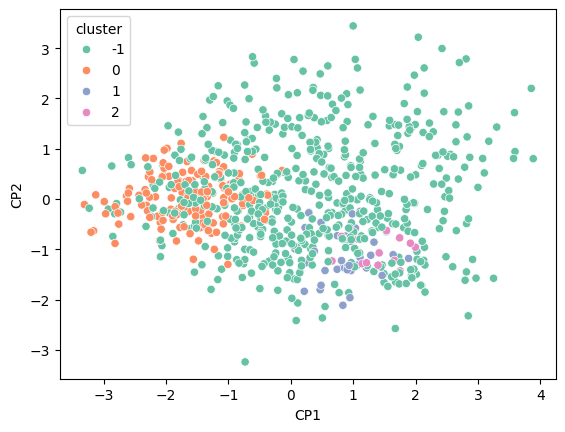

In [33]:
df_pca["cluster"] = clusters_final

sns.scatterplot(data=df_pca, x="CP1", y="CP2", hue="cluster", palette="Set2")


/Users/joubrane/Desktop/COURS/M2/DM/projet/datamining/code/utils.py:62: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



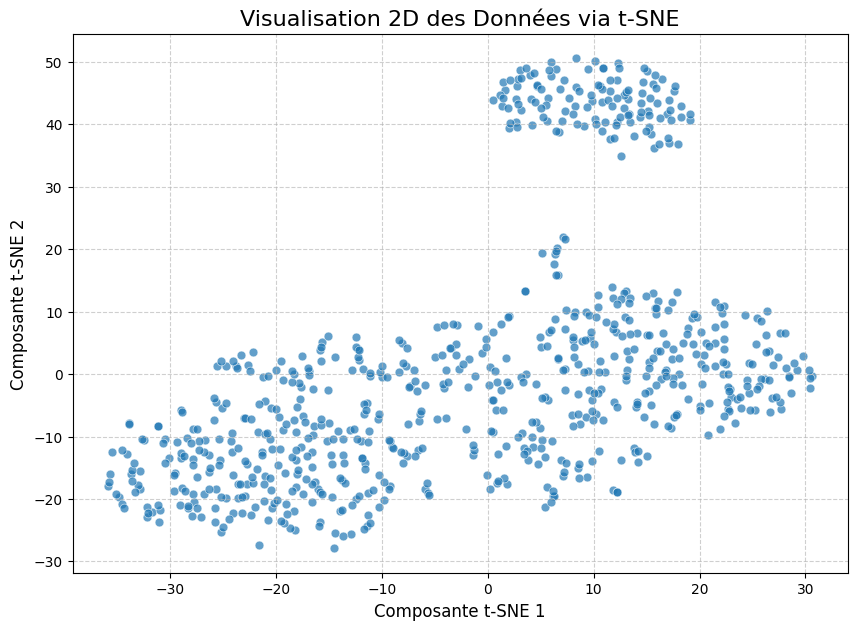

In [34]:
# 1. Réduction de Dimension avec t-SNE
X_tsne = utils.showTSNE(X_reduced)

In [35]:
df_tsne = pd.DataFrame(
    data=X_tsne,
    columns=['CP1', 'CP2']
)

/Users/joubrane/Desktop/COURS/M2/DM/projet/datamining/code/utils.py:263: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



--- Résultat DBSCAN sur t-SNE ---
Paramètres utilisés: Eps=6.0, MinPts=40
Clusters trouvés: 3
Points de bruit: 159 (21.31 %)

Score silhouette : 0.7129


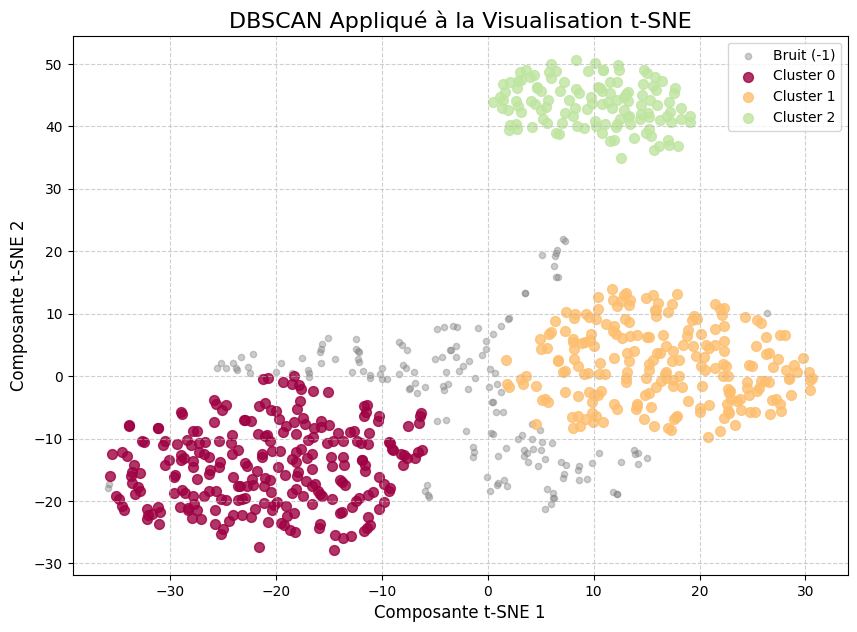

In [36]:
# 1. Paramètres DBSCAN sur Espace t-SNE (2D)
# Les valeurs d'Eps dans l'espace t-SNE sont souvent plus grandes que pour la PCA.
# Nous choisissons des valeurs qui couvrent la densité locale des deux nuages.
EPS_VALUE = 6.      # Un rayon de 5.0 unités semble couvrir les points denses
MIN_SAMPLES_VALUE = 40 # Nombre minimum pour former une région dense


clusters_tsne = utils.dbscanOnTSNE(X_tsne, EPS_VALUE, MIN_SAMPLES_VALUE)




In [37]:
# Hypothèse: clusters_tsne contient les étiquettes (-1, 0, 1)
# y_target contient votre variable cible HeartDisease (0 ou 1)

utils.cluster_summary(clusters_tsne, df_encoded["HeartDisease"])

               Total_Points  Nb_Malades Taux_Maladie
Cluster_Label                                       
-1                      159          71       44.65%
 0                      247          22        8.91%
 1                      217         183       84.33%
 2                      123          80       65.04%
Interprétation du Bruit (-1) : 71 patients (44.65%) parmi les points de bruit sont malades.


<h2> Faire pour les hommes / femmes 

In [38]:
df_homme = df_encoded[df_encoded['Sex_M'] == True]
df_femme = df_encoded[df_encoded['Sex_M'] == False]

df_homme = df_homme.drop(columns=["Sex_M", "Sex_F"])
df_femme = df_femme.drop(columns=["Sex_M", "Sex_F"])

